<a href="https://colab.research.google.com/github/Vaishnavi-Naregavi/DL-Collab/blob/main/1132210414_Vaishnavi_Naregavi_TrainEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Train.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Basic EDA

Display first 5 rows of the dataset

In [ ]:
df.head() 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Display last 5 rows of the dataset

In [ ]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


Shows the number of rows and columns

In [ ]:
df.shape

(8068, 11)

Number of rows in dataset

In [ ]:
df.shape[0]

8068

Number of columns in dataset

In [ ]:
df.shape[1]

11

Shows the variable names and their data types

In [ ]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

Counts the number of non-missing values for each variable

In [ ]:
df.count()

ID                 8068
Gender             8068
Ever_Married       7928
Age                8068
Graduated          7990
Profession         7944
Work_Experience    7239
Spending_Score     8068
Family_Size        7733
Var_1              7992
Segmentation       8068
dtype: int64

Descriptive Analysis

Displays the summary of all numerical variables present in the data

In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Displays the summary of the categorical and numerical values

In [ ]:
df.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


Shows the complete information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Checks for duplicates in the data

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8063    False
8064    False
8065    False
8066    False
8067    False
Length: 8068, dtype: bool

Dropping the column ID and storing the data in another variable

In [ ]:
df2 = df.drop(['ID'], axis = 1)

In [ ]:
df2

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Checks for null values in the dataset

In [ ]:
df2.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Filling the missing values of the categorical data using mode

In [ ]:
df2.Ever_Married.mode()[0]
df2.Ever_Married.fillna(df2.Ever_Married.mode()[0],inplace = True)

In [ ]:
df2.Graduated.mode()[0]
df2.Graduated.fillna(df2.Graduated.mode()[0],inplace = True)

In [ ]:
df2.Profession.mode()[0]
df2.Profession.fillna(df2.Profession.mode()[0],inplace = True)

In [ ]:
df2.Var_1.mode()[0]
df2.Var_1.fillna(df2.Var_1.mode()[0],inplace = True)

Filling the missing values for numerical data using mean

In [ ]:
df2['Work_Experience'] = df2['Work_Experience'].fillna(df2['Work_Experience'].mean())
df2['Family_Size'] = df2['Family_Size'].fillna(df2['Family_Size'].mean())

In [ ]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # Creating a instance of label Encoder.
# Using .fit_transform function to fit label
df2['Gender'] = le.fit_transform(df2['Gender']) # encoder and return encoded label
df2['Gender'].unique() # printing label

array([1, 0])

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df2['Ever_Married'] = le.fit_transform(df2['Ever_Married'])
# printing label
df2['Ever_Married'].unique()

array([0, 1])

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df2['Graduated'] = le.fit_transform(df2['Graduated'])
# printing label
df2['Graduated'].unique()

array([0, 1])

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df2['Profession'] = le.fit_transform(df2['Profession'])
# printing label
df2['Profession'].unique()

array([5, 2, 7, 3, 0, 4, 1, 6, 8, 9])

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df2['Spending_Score'] = le.fit_transform(df2['Spending_Score'])
# printing label
df2['Spending_Score'].unique()

array([2, 0, 1])

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df2['Var_1'] = le.fit_transform(df2['Var_1'])
# printing label
df2['Var_1'].unique()

array([3, 5, 6, 2, 0, 1, 4])

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df2['Segmentation'] = le.fit_transform(df2['Segmentation'])
# printing label
df2['Segmentation'].unique()

array([3, 0, 1, 2])

Detecting Outliers

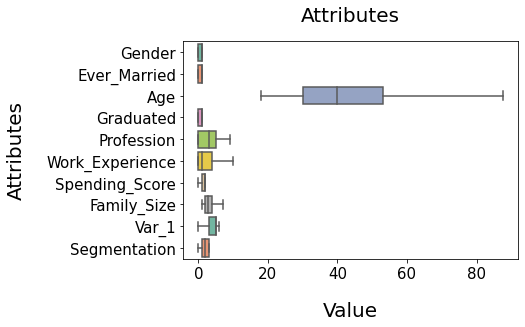

In [ ]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df2[['Gender','Ever_Married','Age','Graduated',
                            'Profession','Work_Experience','Spending_Score',
                            'Family_Size','Var_1','Segmentation']], orient = "h"
                            , palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

From the box plot we can observe that Age, Work_Experice and Family_Size has Outliers

In [ ]:
p0=df2.Age.min()
p100=df2.Age.max()
q1=df2.Age.quantile(0.25)
q2=df2.Age.quantile(0.5)
q3=df2.Age.quantile(0.75)
iqr=q3-q1

In [ ]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  18.0 , p100 =  87.5 , lc =  -4.5 , uc =  87.5


In [ ]:
df2.Age.clip(upper=uc)

0       22.0
1       38.0
2       67.0
3       67.0
4       40.0
        ... 
8063    22.0
8064    35.0
8065    33.0
8066    27.0
8067    37.0
Name: Age, Length: 8068, dtype: float64

In [ ]:
df2.Age.clip(upper=uc,inplace=True)

In [ ]:
p0=df2.Work_Experience.min()
p100=df2.Work_Experience.max()
q1=df2.Work_Experience.quantile(0.25)
q2=df2.Work_Experience.quantile(0.5)
q3=df2.Work_Experience.quantile(0.75)
iqr=q3-q1

In [ ]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr

In [ ]:
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0.0 , p100 =  10.0 , lc =  -6.0 , uc =  10.0


In [ ]:
df2.Work_Experience.clip(upper=uc)

0       1.000000
1       2.641663
2       1.000000
3       0.000000
4       2.641663
          ...   
8063    0.000000
8064    3.000000
8065    1.000000
8066    1.000000
8067    0.000000
Name: Work_Experience, Length: 8068, dtype: float64

In [ ]:
df2.Work_Experience.clip(upper=uc,inplace=True)

In [ ]:
p0=df2.Family_Size.min()
p100=df2.Family_Size.max()
q1=df2.Family_Size.quantile(0.25)
q2=df2.Family_Size.quantile(0.5)
q3=df2.Family_Size.quantile(0.75)
iqr=q3-q1

In [ ]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr

In [ ]:
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  1.0 , p100 =  7.0 , lc =  -1.0 , uc =  7.0


In [ ]:
df2.Family_Size.clip(upper=uc)

0       4.0
1       3.0
2       1.0
3       2.0
4       6.0
       ... 
8063    7.0
8064    4.0
8065    1.0
8066    4.0
8067    3.0
Name: Family_Size, Length: 8068, dtype: float64

In [ ]:
df2.Family_Size.clip(upper=uc,inplace=True)

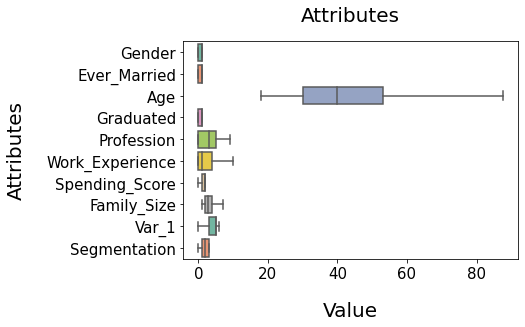

In [ ]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df2[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

We can observe that the Outliers are no more existing

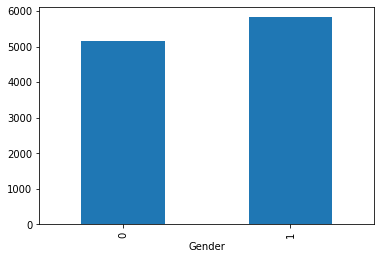

In [ ]:
df2.groupby('Gender').Spending_Score.sum().plot(kind='bar')
plt.show()

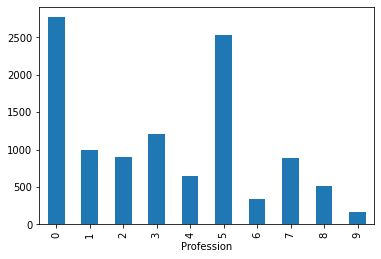

In [ ]:
df2.groupby('Profession').Spending_Score.sum().plot(kind='bar')
plt.show()

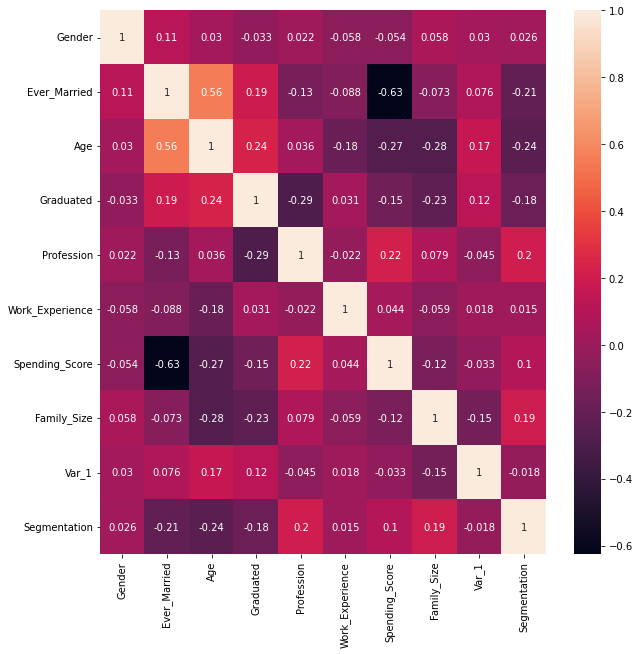

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True,ax=ax)

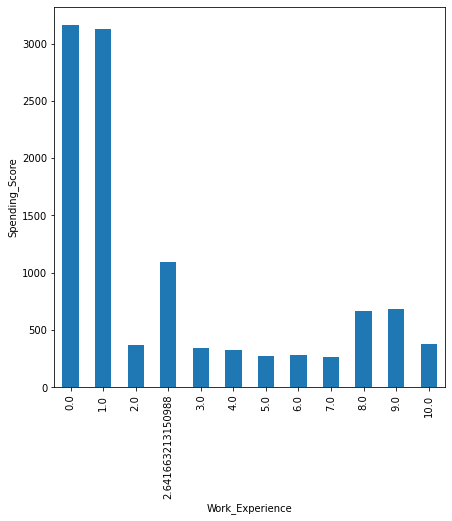

In [ ]:
plt.figure(figsize=(7,7))
df2.groupby('Work_Experience').Spending_Score.sum().plot(kind='bar', xlabel='Work_Experience', ylabel='Spending_Score')
plt.show()

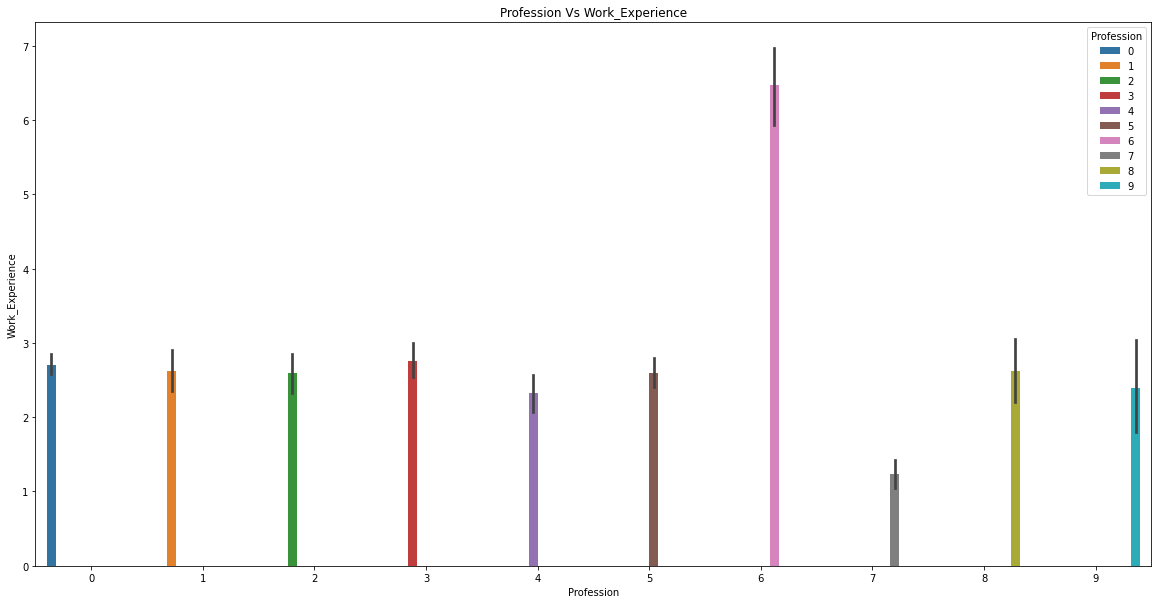

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Profession Vs Work_Experience')
sns.barplot(x=df2['Profession'],y=df['Work_Experience'], hue=df2['Profession'])
#plt.bar(x = df['Profession'], height = df['Work_Experience'], width = 0.4, align='center')
plt.show()

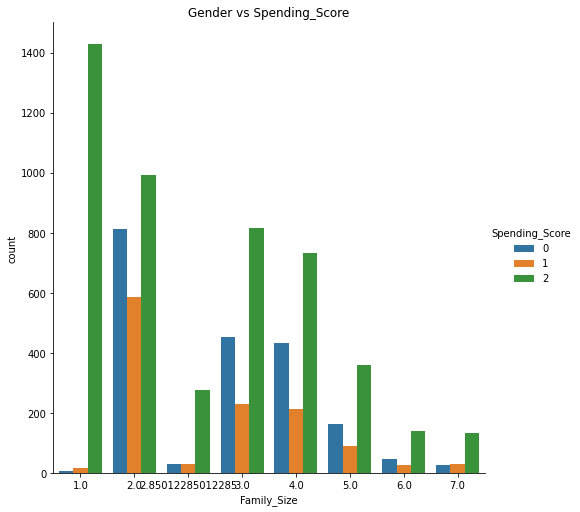

In [ ]:
sns.catplot(x="Family_Size",hue="Spending_Score",data=df2,kind="count",height=7).set(title='Gender vs Spending_Score')

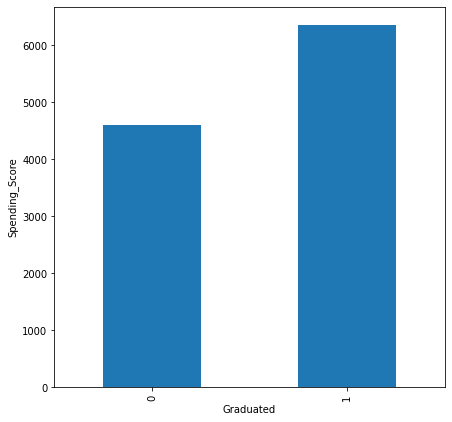

In [ ]:
plt.figure(figsize=(7,7))
df2.groupby('Graduated').Spending_Score.sum().plot(kind='bar', xlabel='Graduated', ylabel='Spending_Score')
plt.show()

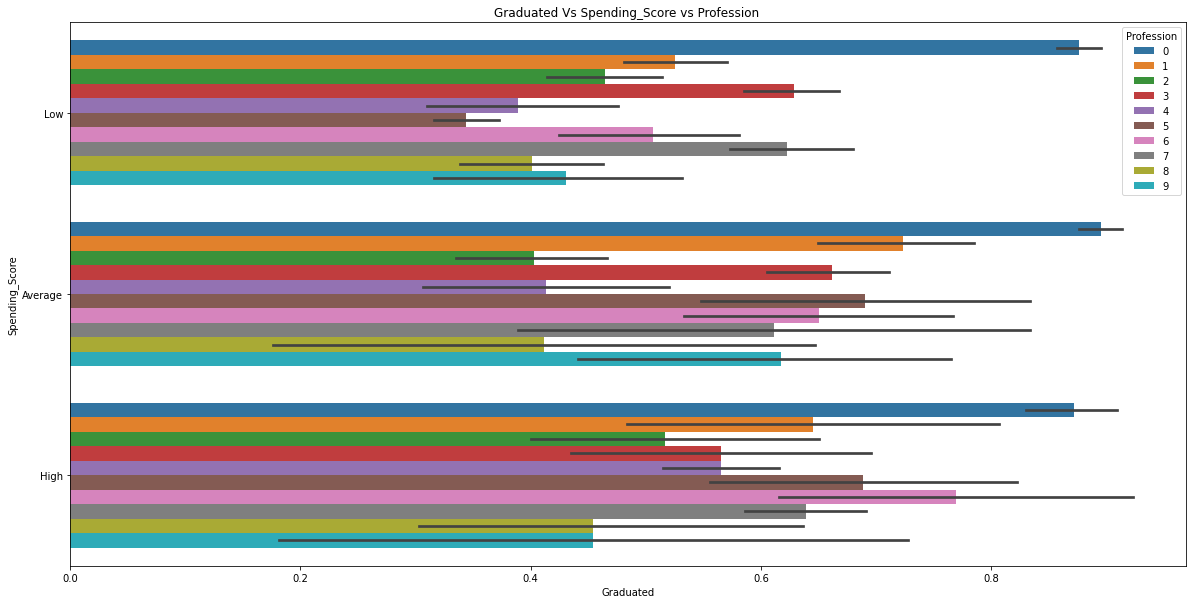

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Graduated Vs Spending_Score vs Profession ')
sns.barplot(x=df2['Graduated'],y=df['Spending_Score'], hue=df2['Profession'])
plt.show()

In [ ]:
x_train = df2.drop(['Segmentation'], axis = 1)
y_train = df2['Segmentation']

In [ ]:
df2.corr()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Gender,1.000000,0.111732,0.030380,-0.033206,0.021762,-0.058026,-0.054261,0.057513,0.029660,0.026403
Ever_Married,0.111732,1.000000,0.557311,0.188450,-0.126847,-0.087638,-0.625252,-0.073159,0.076450,-0.213730
Age,0.030380,0.557311,1.000000,0.236113,0.035818,-0.181060,-0.269916,-0.278192,0.167329,-0.243695
Graduated,-0.033206,0.188450,0.236113,1.000000,-0.289611,0.031380,-0.151911,-0.225265,0.120044,-0.178683
Profession,0.021762,-0.126847,0.035818,-0.289611,1.000000,-0.021582,0.220889,0.078823,-0.045218,0.202419
Work_Experience,-0.058026,-0.087638,-0.181060,0.031380,-0.021582,1.000000,0.043670,-0.059456,0.018161,0.014667
Spending_Score,-0.054261,-0.625252,-0.269916,-0.151911,0.220889,0.043670,1.000000,-0.119377,-0.032833,0.100572
Family_Size,0.057513,-0.073159,-0.278192,-0.225265,0.078823,-0.059456,-0.119377,1.000000,-0.145859,0.194644
Var_1,0.029660,0.076450,0.167329,0.120044,-0.045218,0.018161,-0.032833,-0.145859,1.000000,-0.018339
Segmentation,0.026403,-0.213730,-0.243695,-0.178683,0.202419,0.014667,0.100572,0.194644,-0.018339,1.000000


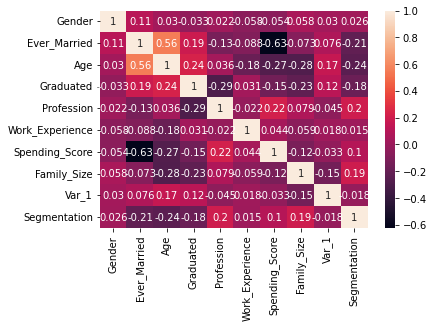

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k='all')
fit=bestfeatures.fit(x_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x_train.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
featureScores

,Specs,Score
0,Gender,5.171987
1,Ever_Married,557.259807
2,Age,7811.179866
3,Graduated,397.167676
4,Profession,2518.084839
5,Work_Experience,243.373163
6,Spending_Score,764.333942
7,Family_Size,224.298917
8,Var_1,51.720135


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_)

[0.02738412 0.03725714 0.3472727  0.039414   0.13984213 0.15829536
 0.05192642 0.11579953 0.08280861]


In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
f1 = scaler.fit(df2)

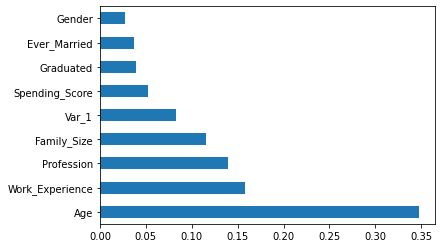

In [ ]:
feat_importances = pd.Series(model.feature_importances_,index = x_train.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [ ]:
bin_data = df2[['Age']]
bin_data['Age_bin'] = pd.cut(df['Age'],bins=[0,40,50,100],labels=["Low","Mid","High"])
bin_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Age_bin
0,22.0,Low
1,38.0,Low
2,67.0,High
3,67.0,High
4,40.0,Low
...,...,...
8063,22.0,Low
8064,35.0,Low
8065,33.0,Low
8066,27.0,Low


In [ ]:
f1

StandardScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(df2) #As we have encoded the data we are using the min max scale 

MinMaxScaler()

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/Test.csv") # loading the dataset
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [ ]:
data.head() #shows first 5 rows of the dataset

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [ ]:
data.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7,A


In [ ]:
data.shape # shows number of columns and rows

(2627, 11)

In [ ]:
data.info() # displays the whole content of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [ ]:
data.describe() # shows all the numeric values

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [ ]:
data1 = data.drop(['ID'],axis = 1) # dropping the column ID

In [ ]:
data1.dtypes # displays the column name and it's datatype

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
data1.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
data1['Ever_Married'] = data1['Ever_Married'].fillna(data1['Ever_Married'].mode()[0])
data1['Graduated'] = data1['Graduated'].fillna(data1['Graduated'].mode()[0])
data1['Profession'] = data1['Profession'].fillna(data1['Profession'].mode()[0])
data1['Var_1'] = data1['Var_1'].fillna(data1['Var_1'].mode()[0])
#filling the missing values of the categorical data using mode

In [ ]:
data1['Work_Experience'] = data1['Work_Experience'].fillna(data['Work_Experience'].mean())
data1['Family_Size'] = data1['Family_Size'].fillna(data['Family_Size'].mean())
#filling the missing values for numerical data using mean

In [ ]:
data1.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
data1['Gender'] = le.fit_transform(data1['Gender'])
# printing label
data1['Gender'].unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
data1['Ever_Married'] = le.fit_transform(data1['Ever_Married'])
# printing label
data1['Ever_Married'].unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
data1['Graduated'] = le.fit_transform(data1['Graduated'])
# printing label
data1['Graduated'].unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
data1['Profession'] = le.fit_transform(data1['Profession'])
# printing label
data1['Profession'].unique()

array([2, 5, 0, 4, 8, 1, 7, 3, 6])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
data1['Spending_Score'] = le.fit_transform(data1['Spending_Score'])
# printing label
data1['Spending_Score'].unique()

array([2, 0, 1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
data1['Var_1'] = le.fit_transform(data1['Var_1'])
# printing label
data1['Var_1'].unique()

array([5, 3, 2, 0, 1, 4, 6])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
data1['Segmentation'] = le.fit_transform(data1['Segmentation'])
# printing label
data1['Segmentation'].unique()

array([1, 0, 2, 3])

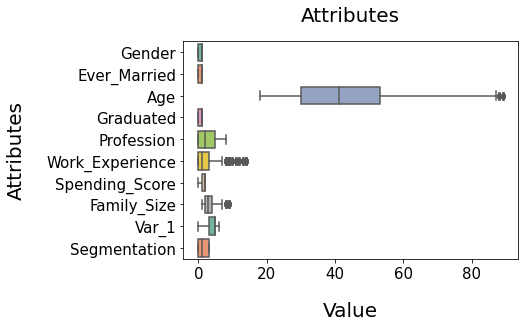

In [ ]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = data1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score',
                              'Family_Size',
                              'Var_1','Segmentation']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [ ]:
p0=data1.Age.min()
p100=data1.Age.max()
q1=data1.Age.quantile(0.25)
q2=data1.Age.quantile(0.5)
q3=data1.Age.quantile(0.75)
iqr=q3-q1

In [ ]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  18 , p100 =  89 , lc =  -4.5 , uc =  87.5


In [ ]:
data1.Age.clip(upper=uc)

0       36.0
1       37.0
2       69.0
3       59.0
4       19.0
        ... 
2622    29.0
2623    35.0
2624    53.0
2625    47.0
2626    43.0
Name: Age, Length: 2627, dtype: float64

In [ ]:
data1.Age.clip(upper=uc,inplace=True)

In [ ]:
p0=data1.Work_Experience.min()
p100=data1.Work_Experience.max()
q1=data1.Work_Experience.quantile(0.25)
q2=data1.Work_Experience.quantile(0.5)
q3=data1.Work_Experience.quantile(0.75)
iqr=q3-q1

In [ ]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0.0 , p100 =  14.0 , lc =  -4.5 , uc =  7.5


In [ ]:
data1.Work_Experience.clip(upper=uc)

0       0.000000
1       7.500000
2       0.000000
3       7.500000
4       2.552587
          ...   
2622    7.500000
2623    1.000000
2624    2.552587
2625    1.000000
2626    7.500000
Name: Work_Experience, Length: 2627, dtype: float64

In [ ]:
data1.Work_Experience.clip(upper=uc,inplace=True)

In [ ]:
p0=data1.Family_Size.min()
p100=data1.Family_Size.max()
q1=data1.Family_Size.quantile(0.25)
q2=data1.Family_Size.quantile(0.5)
q3=data1.Family_Size.quantile(0.75)
iqr=q3-q1

In [ ]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  1.0 , p100 =  9.0 , lc =  -1.0 , uc =  7.0


In [ ]:
data1.Family_Size.clip(upper=uc)

0       1.0
1       4.0
2       1.0
3       2.0
4       4.0
       ... 
2622    4.0
2623    1.0
2624    2.0
2625    5.0
2626    3.0
Name: Family_Size, Length: 2627, dtype: float64

In [ ]:
data1.Family_Size.clip(upper=uc,inplace=True)

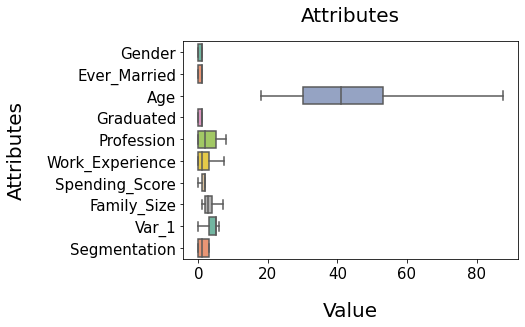

In [ ]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = data1[['Gender','Ever_Married','Age','Graduated','Profession',
                             'Work_Experience','Spending_Score',
                              'Family_Size',
                              'Var_1','Segmentation']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [ ]:
x_test = data1.drop(['Segmentation'],axis=1)
y_test = data1['Segmentation']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k='all')
fit=bestfeatures.fit(x_test,y_test)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x_test.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
featureScores

,Specs,Score
0,Gender,1.007128
1,Ever_Married,32.303275
2,Age,902.793742
3,Graduated,14.950576
4,Profession,76.279275
5,Work_Experience,9.008318
6,Spending_Score,24.214367
7,Family_Size,14.388482
8,Var_1,0.533440


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(data1) # Using minmax scaler 

MinMaxScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data1) # Using standard scaler 

StandardScaler()

In [ ]:
print('Training data size : ', x_train.shape)
print('Test data size : ', x_test.shape)

Training data size :  (8068, 9)
Test data size :  (2627, 9)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
accuracy_scores = np.zeros(5)

In [ ]:
clf = KNeighborsClassifier().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[1]))

K Nearest Neighbors Classifier accuracy: 32.66082984392843%


In [ ]:
clf = RandomForestClassifier().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

Random Forest Classifier accuracy: 32.16596878568709%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print(knn.predict(x_test))

[1 2 2 ... 0 1 0]


In [ ]:
print(knn.score(x_test, y_test))

0.33764750666159116


In [ ]:
clf = KNeighborsClassifier().fit(x_train, y_train)
prediction = clf.predict(x_train)
accuracy_scores[1] = accuracy_score(y_train, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[1]))

K Nearest Neighbors Classifier accuracy: 63.52255825483392%


In [ ]:
clf = KNeighborsClassifier().fit(x_test, y_test)
prediction = clf.predict(x_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[1]))

K Nearest Neighbors Classifier accuracy: 53.78759040730871%


In [ ]:
clf = RandomForestClassifier().fit(x_train, y_train)
prediction = clf.predict(x_train)
accuracy_scores[2] = accuracy_score(y_train, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

Random Forest Classifier accuracy: 95.73624194348042%


In [ ]:
clf = RandomForestClassifier().fit(x_test, y_test)
prediction = clf.predict(x_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

Random Forest Classifier accuracy: 97.56376094404263%
